In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = r"/Applications/QTM-347/yelp_dataset.tar"

In [ ]:
review = pd.read_json(r"/Applications/QTM-347/yelp_academic_dataset_review.json", lines=True, chunksize=1000000)

In [ ]:
for r in review:
    subset = r
    break

In [ ]:
subset.shape

(1000000, 9)

In [ ]:
business = pd.read_json(r"C:\Users\joshu\Desktop\QTM 302W Lab\Lab__1\yelp_academic_dataset_business.json", lines=True, chunksize=1000000)

In [ ]:
for b in business:
    bsub = b
    break

In [ ]:
bsub.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
df = pd.merge(subset, bsub, on="business_id")

In [ ]:
df['state'].value_counts()

state
PA    238678
FL    154822
LA    117860
TN     88119
MO     77875
IN     70044
NV     58549
AZ     56204
CA     48079
NJ     38119
ID     18750
AB     16769
DE      8587
IL      7468
NC        29
CO        23
HI        19
WA         6
Name: count, dtype: int64

In [ ]:
df = df[df['state'] == 'FL']

In [ ]:
df['city'].value_counts()

city
Tampa               60131
Saint Petersburg    11049
Clearwater          10192
St. Petersburg       7220
Brandon              5731
                    ...  
S Pasadena              2
​Largo                  1
Central Tampa           1
Ste C                   1
New Pt Richey           1
Name: count, Length: 102, dtype: int64

In [ ]:
tampa_data = df[df['city'] == 'Tampa']

In [ ]:
tampa_data.shape

(60131, 22)

In [ ]:
tampa_data.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
tampa_data.to_csv(r'C:\Users\joshu\Desktop\QTM 302W Lab\Lab__1\tampa_data.csv')

In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
tampa_data = pd.read_csv('/content/drive/MyDrive/Machine_learning_data/tampa_data.csv')

## Data Analysis

In [ ]:
reviewData = pd.DataFrame(np.array(tampa_data['text']), columns = ['text'])

In [ ]:
reviewData.head()

,text
0,My experience with Shalimar was nothing but wo...
1,"Great place for breakfast! I had the waffle, w..."
2,I go to blow bar to get my brows done by natal...
3,"First time here and they did a great job, very..."
4,Skip this train wreck if you are looking for d...


In [ ]:
#How many reviews are there
len(reviewData['text'])

60131

In [ ]:
#Calculate word count
reviewData['word_count'] = reviewData['text'].apply(lambda x: len(x.split()))

In [ ]:
reviewData.head()

,text,word_count
0,My experience with Shalimar was nothing but wo...,177
1,"Great place for breakfast! I had the waffle, w...",29
2,I go to blow bar to get my brows done by natal...,78
3,"First time here and they did a great job, very...",22
4,Skip this train wreck if you are looking for d...,49


In [ ]:
#Calculate character count
reviewData['char_count'] = reviewData['text'].apply(lambda x: len(x))

In [ ]:
#Average length of each word
def average_words(x):
    words = x.split()
    return sum(len(word) for word in words) / len(words)

In [ ]:
reviewData['avg_word_length'] = reviewData['text'].apply(lambda x: average_words(x))

In [4]:
#Number of stop words in review
#(stop words that don't add much to context of review)
# When doing data cleaning we're scripting them out
import nltk.corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [6]:
#How many stop words are there in the stop_words dataset
len(stop_words)

179

In [ ]:
reviewData['stopwords_count'] = reviewData['text'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

In [ ]:
reviewData['stopword_rate'] = reviewData['stopwords_count'] / reviewData['word_count']

In [ ]:
reviewData.head()

,text,word_count,char_count,avg_word_length,stopwords_count,stopword_rate
0,My experience with Shalimar was nothing but wo...,177,1009,4.694915,87,0.491525
1,"Great place for breakfast! I had the waffle, w...",29,175,5.068966,14,0.482759
2,I go to blow bar to get my brows done by natal...,78,393,4.051282,36,0.461538
3,"First time here and they did a great job, very...",22,113,4.136364,12,0.545455
4,Skip this train wreck if you are looking for d...,49,288,4.816327,21,0.428571


In [ ]:
reviewData.sort_values(by='stopword_rate')

,text,word_count,char_count,avg_word_length,stopwords_count,stopword_rate
18853,"Good food, fresh good price. Sabor Dominicano",7,45,5.571429,0,0.000000
22322,Always good. Delicious food. Nice staff. Good ...,17,122,6.235294,0,0.000000
17614,great chix burrito..limited menu...everything ...,6,59,9.000000,0,0.000000
34967,Nice place + Fresh lobster + Super nice waiter,9,46,4.222222,0,0.000000
39162,Pésimo son ladrones con licencia,5,32,5.600000,0,0.000000
...,...,...,...,...,...,...
34056,i love her so much. she is the only person i w...,38,188,3.973684,26,0.684211
2178,Portions are small but it is all you can eat. ...,49,206,3.224490,34,0.693878
34903,They are not trust worthy. They will give you ...,37,172,3.675676,26,0.702703
59013,All I can say is this was so yummy it hit the ...,21,85,3.095238,15,0.714286


In [ ]:
reviewData.describe()

,word_count,char_count,avg_word_length,stopwords_count,stopword_rate
count,60131.000000,60131.000000,60131.000000,60131.000000,60131.000000
mean,102.541035,553.845936,4.465618,48.531789,0.454085
std,96.834290,519.366253,0.785616,48.043259,0.075079
min,1.000000,6.000000,2.916667,0.000000,0.000000
25%,40.000000,222.000000,4.200000,18.000000,0.420168
50%,72.000000,392.000000,4.406593,34.000000,0.466667
75%,130.000000,700.000000,4.653846,62.000000,0.500000
max,1003.000000,5000.000000,163.000000,555.000000,0.720000


## Data Cleaning

In [7]:
tampaClean = tampa_data

In [8]:
tampaClean['text'] = tampaClean['text'].astype(str)

In [9]:
#Makes it lowercase
tampaClean['lowercase'] = tampaClean['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [10]:
#Remove punctuation
import string
tampaClean['punctuation'] = tampaClean['lowercase'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [11]:
#Remove stopwords
tampaClean['stopwords'] = tampaClean['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [ ]:
tampaClean.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,longitude,stars_y,review_count,is_open,attributes,categories,hours,lowercase,punctuation,stopwords
0,10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,6/21/2015 14:48,...,-82.527879,2.5,8,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Shopping, Jewelry","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",my experience with shalimar was nothing but wo...,my experience with shalimar was nothing but wo...,experience shalimar nothing wonderful wanted g...
1,15,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",10/11/2014 16:22,...,-82.506004,4.5,162,1,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Restaurants, American (New), Ameri...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-19:30', ...","great place for breakfast! i had the waffle, w...",great place for breakfast i had the waffle whi...,great place breakfast waffle fluffy perfect ho...
2,18,u2vzZaOqJ2feRshaaF1doQ,NDZvyYHTUWWu-kqgQzzDGQ,CLEWowfkj-wKYJlQDqT1aw,5,2,0,1,I go to blow bar to get my brows done by natal...,3/7/2016 0:02,...,-82.505307,4.0,55,1,"{'BusinessParking': ""{'garage': False, 'street...","Makeup Artists, Blow Dry/Out Services, Beauty ...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-16:0', '...",i go to blow bar to get my brows done by natal...,i go to blow bar to get my brows done by natal...,go blow bar get brows done natalie brow specia...
3,74,EZarjNNbO_2yH1Xbizog9g,R_W9WlKiA56VzVbRzTULQQ,pR8u8hXf1vvzoAGOoKHQqQ,5,1,0,0,"First time here and they did a great job, very...",8/25/2016 17:17,...,-82.452363,4.5,48,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Auto Detailing, Car Wash, Automotive","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","first time here and they did a great job, very...",first time here and they did a great job very ...,first time great job satisfied car wash servic...
4,84,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,0,1,0,Skip this train wreck if you are looking for d...,2/11/2018 3:11,...,-82.482862,3.5,544,1,"{'BikeParking': 'True', 'Alcohol': ""'full_bar'...","Wine Bars, Desserts, Bars, American (New), Nig...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",skip this train wreck if you are looking for d...,skip this train wreck if you are looking for d...,skip train wreck looking dinner server clueles...


In [12]:
pd.Series(" ".join(tampaClean['stopwords']).split()).value_counts()[:30]

,count
food,32411
place,28293
good,27639
great,27218
service,20387
time,19289
like,18515
get,17575
back,17470
one,17388


In [13]:
other_stop_words = ['get', 'told', 'would', 'week', 'us', 'one', 'go', 'us', 'im', 'ive']

In [14]:
tampaClean['cleanreview'] = tampaClean['stopwords'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stop_words))

In [ ]:
tampaClean.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,stars_y,review_count,is_open,attributes,categories,hours,lowercase,punctuation,stopwords,cleanreview
0,10,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,6/21/2015 14:48,...,2.5,8,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Shopping, Jewelry","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",my experience with shalimar was nothing but wo...,my experience with shalimar was nothing but wo...,experience shalimar nothing wonderful wanted g...,experience shalimar nothing wonderful wanted e...
1,15,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",10/11/2014 16:22,...,4.5,162,1,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Restaurants, American (New), Ameri...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-19:30', ...","great place for breakfast! i had the waffle, w...",great place for breakfast i had the waffle whi...,great place breakfast waffle fluffy perfect ho...,great place breakfast waffle fluffy perfect ho...
2,18,u2vzZaOqJ2feRshaaF1doQ,NDZvyYHTUWWu-kqgQzzDGQ,CLEWowfkj-wKYJlQDqT1aw,5,2,0,1,I go to blow bar to get my brows done by natal...,3/7/2016 0:02,...,4.0,55,1,"{'BusinessParking': ""{'garage': False, 'street...","Makeup Artists, Blow Dry/Out Services, Beauty ...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-16:0', '...",i go to blow bar to get my brows done by natal...,i go to blow bar to get my brows done by natal...,go blow bar get brows done natalie brow specia...,blow bar brows done natalie brow specialist hi...
3,74,EZarjNNbO_2yH1Xbizog9g,R_W9WlKiA56VzVbRzTULQQ,pR8u8hXf1vvzoAGOoKHQqQ,5,1,0,0,"First time here and they did a great job, very...",8/25/2016 17:17,...,4.5,48,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Auto Detailing, Car Wash, Automotive","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...","first time here and they did a great job, very...",first time here and they did a great job very ...,first time great job satisfied car wash servic...,first time great job satisfied car wash servic...
4,84,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,0,1,0,Skip this train wreck if you are looking for d...,2/11/2018 3:11,...,3.5,544,1,"{'BikeParking': 'True', 'Alcohol': ""'full_bar'...","Wine Bars, Desserts, Bars, American (New), Nig...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",skip this train wreck if you are looking for d...,skip this train wreck if you are looking for d...,skip train wreck looking dinner server clueles...,skip train wreck looking dinner server clueles...


In [15]:
#Make it only restaurants
tampaCleanRest = tampaClean[tampaClean['categories'].str.contains('Restaurants', na=False)]

In [ ]:
tampaCleanRest

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,stars_y,review_count,is_open,attributes,categories,hours,lowercase,punctuation,stopwords,cleanreview
1,15,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",10/11/2014 16:22,...,4.5,162,1,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Restaurants, American (New), Ameri...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-19:30', ...","great place for breakfast! i had the waffle, w...",great place for breakfast i had the waffle whi...,great place breakfast waffle fluffy perfect ho...,great place breakfast waffle fluffy perfect ho...
4,84,meGaFP7yxQdjyABrYDVeoQ,_jaJDV-qTBafatbObmtzpA,cg4JFJcCxRTTMmcg9O9KtA,1,0,1,0,Skip this train wreck if you are looking for d...,2/11/2018 3:11,...,3.5,544,1,"{'BikeParking': 'True', 'Alcohol': ""'full_bar'...","Wine Bars, Desserts, Bars, American (New), Nig...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",skip this train wreck if you are looking for d...,skip this train wreck if you are looking for d...,skip train wreck looking dinner server clueles...,skip train wreck looking dinner server clueles...
5,98,PPgbLBvi34A6m7bKJfTwhw,3TL6HZ1JrKcNTvGDWKlrow,GyC36Pn0Q1-qHnqXys6yFg,1,0,0,0,Service and management terrible... After messi...,12/7/2013 13:17,...,3.5,108,1,"{'BusinessAcceptsCreditCards': 'True', 'HasTV'...","Southern, Comfort Food, Caterers, Breakfast & ...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",service and management terrible... after messi...,service and management terrible after messing ...,service management terrible messing 4 orders w...,service management terrible messing 4 orders w...
8,130,LnKr0hwejzl71QmoQyTRDQ,7RU_xK1tEGlUvXfe0GvtEg,hAmuto6UndVroyd_DaD-TA,5,1,0,0,Not sure why it took until now for us to find ...,3/4/2018 0:20,...,4.0,441,1,"{'HasTV': 'False', 'RestaurantsPriceRange2': '...","Specialty Food, Seafood Markets, Seafood, Food...","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3...",not sure why it took until now for us to find ...,not sure why it took until now for us to find ...,sure took us find place started going chain lo...,sure took find place started going chain lobst...
12,161,wsFRDsHxz2mM_Ettgn1qQg,x8ErSBur0SsnL1lZwP5o4Q,qf4LecJDQWIt0gt6VJWFPw,4,0,0,0,We got diverted to Tampa and decided to make t...,6/28/2017 1:07,...,3.5,95,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Burgers, Steakhouses, Restaurants, American (T...","{'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...",we got diverted to tampa and decided to make t...,we got diverted to tampa and decided to make t...,got diverted tampa decided make drive orlando ...,got diverted tampa decided make drive orlando ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60123,999879,UO6dPFBKY6aQeiKsscEs5w,NhCou7yj-VHGes5O4XryfA,IZAMcBLQ365GsrgonoM79w,4,7,4,6,Wow!!! Didn't see this coming. I went to Bush ...,2/16/2017 17:16,...,3.5,52,1,"{'Alcohol': ""'beer_and_wine'"", 'NoiseLevel': ""...","Food, Smokehouse, Bars, Nightlife, American (N...",NaN,wow!!! didn't see this coming. i went to bush ...,wow didnt see this coming i went to bush garde...,wow didnt see coming went bush gardens last fr...,wow didnt see coming went bush gardens last fr...
60124,999887,_wzxxj6IvzvGfNpeJOOpCg,JSzIwMqdSI74_ztnbWzsEA,xODBZmX4EmlVvbqtKN7YKg,3,4,3,4,"Beware: On specials nights, there are a lot of...",5/2/2013 21:42,...,3.5,327,1,"{'Caters': 'True', 'RestaurantsReservations': ...","Seafood, Bars, American (New), Nightlife, Rest...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...","beware: on specials nights, there are a lot of...",beware on specials nights there are a lot of k...,beware specials nights lot kids pets running a...,beware specials nights lot kids pets running a...
60126,999917,zYLwH2QuBOCBGdRT2mE1aw,FcBDHJQEJ_n0RV4hZsJu9A,_0QZGrg91aaiMhh7tQyYYg,3,3,0,1,"Great view, efficient services, ve

## Lemmatization

In [16]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
import textblob
from textblob import Word

In [18]:
tampaCleanLemma = tampaCleanRest

In [19]:
tampaCleanLemma['lemmatized'] = tampaCleanLemma['cleanreview'].apply(
    lambda x: " ".join(Word(word).lemmatize() for word in x.split())
)

<ipython-input-19-3e70ee1d6a2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tampaCleanLemma['lemmatized'] = tampaCleanLemma['cleanreview'].apply(


## Tokenize

In [24]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
tampaCleanLemma['review_tokenized'] = tampaCleanLemma['lemmatized'].apply (lambda x: nltk.word_tokenize (x))

<ipython-input-25-67cdc44f0f63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tampaCleanLemma['review_tokenized'] = tampaCleanLemma['lemmatized'].apply (lambda x: nltk.word_tokenize (x))


In [26]:
tampaCleanLemma['stars_x'].describe()

,stars_x
count,40109.000000
mean,3.804258
std,1.395099
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


## Classification

In [27]:
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [28]:
def sentiment_from_stars(stars):
    if stars > 3.5:
        return "positive"
    elif 2.5 >= stars <= 3.5:
        return "neutral"
    else:
        return "negative"

# Apply to create the sentiment column
tampaCleanLemma['sentiment'] = tampaCleanLemma['stars_x'].apply(sentiment_from_stars)

<ipython-input-28-769c7f82e82b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tampaCleanLemma['sentiment'] = tampaCleanLemma['stars_x'].apply(sentiment_from_stars)


In [34]:
tampaCleanLemma = tampaCleanLemma.sample(n=10000, replace=True, random_state=42)

In [36]:
# Rhett's idea: group by business ids and see how many reviews we have for each business
# Use as test data?
distinct_business_ids = tampaCleanLemma['business_id'].nunique()
print(f"Number of distinct business IDs: {distinct_business_ids}")

review_counts_per_business = tampaCleanLemma.groupby('business_id').size().reset_index(name='review_count')
#print(review_counts_per_business)
top_20_businesses = review_counts_per_business.sort_values(by='review_count', ascending=False).head(20)
print(top_20_businesses)

Number of distinct business IDs: 486
                business_id  review_count
128  KP5OncF2jhT7_J1phHPPww           275
370  oqP1oQEycpp4J6u5YebRoQ           223
78   BjBDHqHhMXSxgyVipccznQ           205
189  SwBhaxfQPbyhsi0QHUAN0A           205
316  ixPTo6Hum7nNZ7A4VPhTXg           154
446  w0lcP2ngFaUpBGi5yzlYDw           152
275  cg4JFJcCxRTTMmcg9O9KtA           147
280  dIpTuL2T1L98GQGU17IeSw           140
243  _0QZGrg91aaiMhh7tQyYYg           132
190  Swjkmg5qAHT6hwXQRWQoHQ           129
484  z_7TZeTXsDH6MmkPHQN8nQ           128
312  hAmuto6UndVroyd_DaD-TA           119
26   3yI-7C8JzbG-ZaSqAGHMAQ           108
3    0hIXH9jMdHov1VrLC8ujUg           106
141  M2ZrrqseHE5xssUrOL0Gtg           105
33   5JiFbBsbUdb-caBZWRyMSw            99
213  VZfc50XVwgdCecH4YbGNFg            91
0                    #NAME?            91
462  xT41eqUSsM_MDE1Vjhq20A            90
352  mLNSOU8Ki0Fm09xd6ZKkcA            89


In [37]:
# Filter business_ids with 50 or more reviews
business_ids_with_50_or_more_reviews = review_counts_per_business[review_counts_per_business['review_count'] >= 50]['business_id']

# Create a new dataframe with only those business_ids
filtered_tampaCleanLemma = tampaCleanLemma[tampaCleanLemma['business_id'].isin(business_ids_with_50_or_more_reviews)]

filtered_tampaCleanLemma.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,...,attributes,categories,hours,lowercase,punctuation,stopwords,cleanreview,lemmatized,sentiment,review_tokenized
1192,21587,JRc-e2A1LNkQARzmv9-egA,x2eyN6MyTNoRk8WE9VxrvA,KP5OncF2jhT7_J1phHPPww,4,0,0,0,Excellent Mexican restaurant. Hard to impress ...,12/6/2015 2:23,...,"{'BusinessParking': ""{'garage': True, 'street'...","Mexican, Restaurants, Salad, Food, Bars, Night...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:...",excellent mexican restaurant. hard to impress ...,excellent mexican restaurant hard to impress m...,excellent mexican restaurant hard impress mexi...,excellent mexican restaurant hard impress mexi...,excellent mexican restaurant hard impress mexi...,positive,"[excellent, mexican, restaurant, hard, impress..."
57213,941602,Ssv9QkuW9LCFrHMsHNQzsA,Lriz_QCw5NFH4E7zK5ZmsA,z_7TZeTXsDH6MmkPHQN8nQ,5,0,0,0,This place is fantastic! I had the fish tacos ...,11/2/2012 0:03,...,"{'WiFi': ""u'free'"", 'BusinessAcceptsCreditCard...","American (New), Cafes, Restaurants, Food","{'Monday': '0:0-0:0', 'Tuesday': '17:0-23:0', ...",this place is fantastic! i had the fish tacos ...,this place is fantastic i had the fish tacos w...,place fantastic fish tacos come catch day alwa...,place fantastic fish tacos come catch day alwa...,place fantastic fish taco come catch day alway...,positive,"[place, fantastic, fish, taco, come, catch, da..."
15740,280511,RqAPncA1Yvv4c3SVNlqEIg,wzUFZ3DaU7k9R2S54IMPfg,VZfc50XVwgdCecH4YbGNFg,4,3,0,0,Found out about this place from CL deals and c...,11/3/2017 23:41,...,"{'RestaurantsPriceRange2': '2', 'OutdoorSeatin...","American (New), Diners, American (Traditional)...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",found out about this place from cl deals and c...,found out about this place from cl deals and c...,found place cl deals came 25 coupon expected w...,found place cl deals came 25 coupon expected w...,found place cl deal came 25 coupon expected wa...,positive,"[found, place, cl, deal, came, 25, coupon, exp..."
8741,155753,dIAzwyEmru-91U9ehE-Kjg,FGDIoeLU--rSGg4-lxBnkQ,SwBhaxfQPbyhsi0QHUAN0A,1,1,0,0,One star because who charges to park? I don't...,2/2/2017 22:40,...,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Hotels, Coffee & Tea, Hotels & Travel, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",one star because who charges to park? i don't ...,one star because who charges to park i dont ca...,one star charges park dont care remodeling you...,star charges park dont care remodeling youre c...,star charge park dont care remodeling youre ca...,neutral,"[star, charge, park, dont, care, remodeling, y..."
55808,913384,bxiwLf-cbo0K2TimkocvMQ,50V3UxV1yeHnnXKQWKD0pA,bY55freuP8C_wr6y5Fid7w,4,1,0,0,The locals will laugh but this was my first pl...,3/12/2014 0:24,...,"{'RestaurantsAttire': ""u'casual'"", 'GoodForKid...","Cuban, Sandwiches, Breakfast & Brunch, Spanish...","{'Monday': '6:0-15:0', 'Tuesday': '6:0-15:0', ...",the locals will laugh but this was my first pl...,the locals will laugh but this was my first pl...,locals laugh first place ever try cuban sandwi...,locals laugh first place ever try cuban sandwi...,local laugh first place ever try cuban sandwic...,positive,"[local, laugh, first, place, ever, try, cuban,..."


In [38]:
# X: Use 'lemmatized' column for features
X = tampaCleanLemma['review_tokenized'].fillna("").apply(lambda x: " ".join(x))
y = tampaCleanLemma['sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numeric using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [39]:
# Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)


# Logistic Regression Results
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.72      0.23      0.35       235
     neutral       0.84      0.79      0.81       390
    positive       0.86      0.98      0.92      1375

    accuracy                           0.85      2000
   macro avg       0.81      0.67      0.69      2000
weighted avg       0.84      0.85      0.83      2000



In [40]:
# Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       235
     neutral       0.95      0.14      0.25       390
    positive       0.71      1.00      0.83      1375

    accuracy                           0.71      2000
   macro avg       0.55      0.38      0.36      2000
weighted avg       0.67      0.71      0.62      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
def summarize(predictions):
	from collections import Counter
	summary = Counter(predictions)
	print("Summary of predictions:")
	for label, count in summary.items():
		print(f"{label}: {count}")

In [42]:
print("Logistic Regression Summary:")
summarize(y_pred_log_reg)

print("\nNaive Bayes Summary:")
summarize(y_pred_nb)

Logistic Regression Summary:
Summary of predictions:
positive: 1556
neutral: 368
negative: 76

Naive Bayes Summary:
Summary of predictions:
positive: 1942
neutral: 58


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on Train Data')

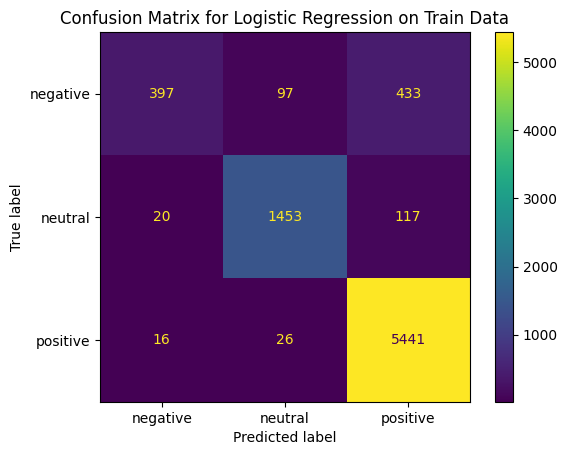

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions for the training set
y_pred_log_reg_train = log_reg.predict(X_train_tfidf)

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_log_reg_train, labels=["negative", "neutral", "positive"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="viridis")
disp.ax_.set_title('Confusion Matrix for Logistic Regression on Train Data')

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression on Test Data')

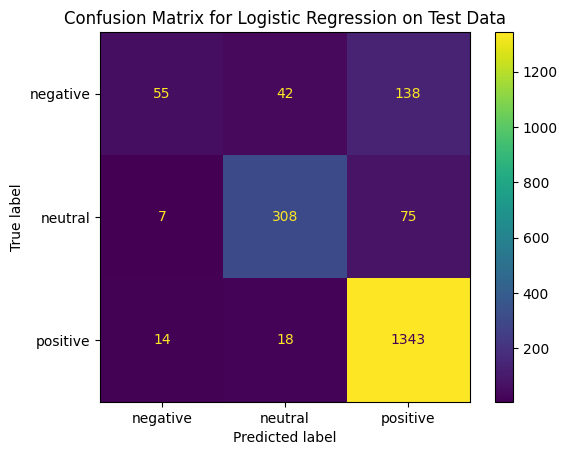

In [44]:
cm_test = confusion_matrix(y_test, y_pred_log_reg, labels=["negative", "neutral", "positive"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="viridis")
disp.ax_.set_title('Confusion Matrix for Logistic Regression on Test Data')



Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes on Train Data')

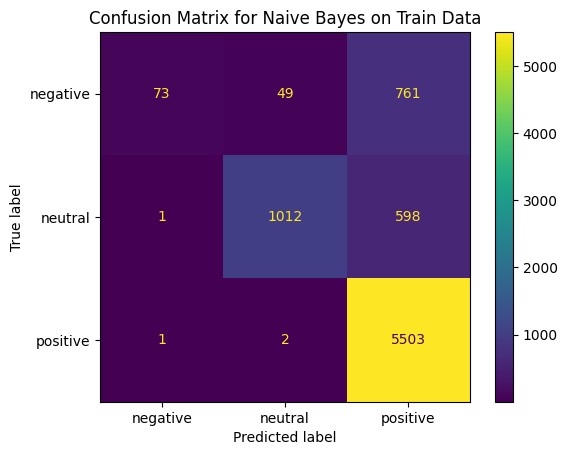

In [ ]:
# Generate predictions for the training set
y_pred_nb_train = nb.predict(X_train_tfidf)

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_nb_train, labels=["negative", "neutral", "positive"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap="viridis")
disp.ax_.set_title('Confusion Matrix for Naive Bayes on Train Data')

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes on Test Data')

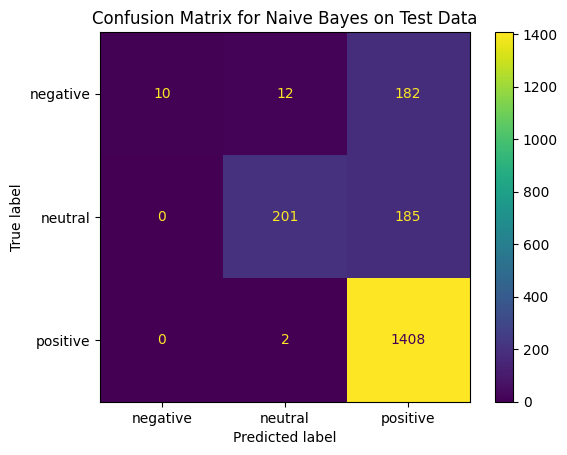

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap='viridis')
disp.ax_.set_title('Confusion Matrix for Naive Bayes on Test Data')

We will now use PCA in order to reduce the data's dimensionality so we can use more advanced models.

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.linear_model as skl

In [48]:
y_numeric = y_train.map({'negative': -1, 'neutral': 0, 'positive': 1})

In [49]:
y_numeric_test = y_test.map({'negative': -1, 'neutral': 0, 'positive': 1})

In [51]:
X_train_tfidf = vectorizer.fit_transform(X_train)

pca = PCA(n_components=21)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca), ('linreg', linreg)])
pipe.fit(X_train_tfidf.toarray(), y_numeric)
pipe.named_steps['linreg'].coef_

array([ 0.58608422,  3.54304569, -1.8033723 ,  0.31574225, -0.61422622,
        0.24293767,  1.76962878,  0.19768391,  1.3874968 , -0.77250602,
       -1.14204493,  0.76627011,  0.35422409,  0.32481838, -1.20944806,
        0.99374991,  0.01719893,  0.54704562,  0.06568156, -1.01469777,
       -0.73944925])

In [52]:
# In order to improve our model, we can use cross-validation to find the best number of components for PCA
import sklearn.model_selection as skm
K = 5
kfold = skm.KFold(K, random_state=0, shuffle=True)

In [53]:
param_grid = {'pca__n_components': range(1, 21)}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X_train_tfidf.toarray(), y_numeric)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA(n_components=21)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 21)},
             scoring='neg_mean_squared_error')

In [54]:
grid.best_params_

{'pca__n_components': 19}

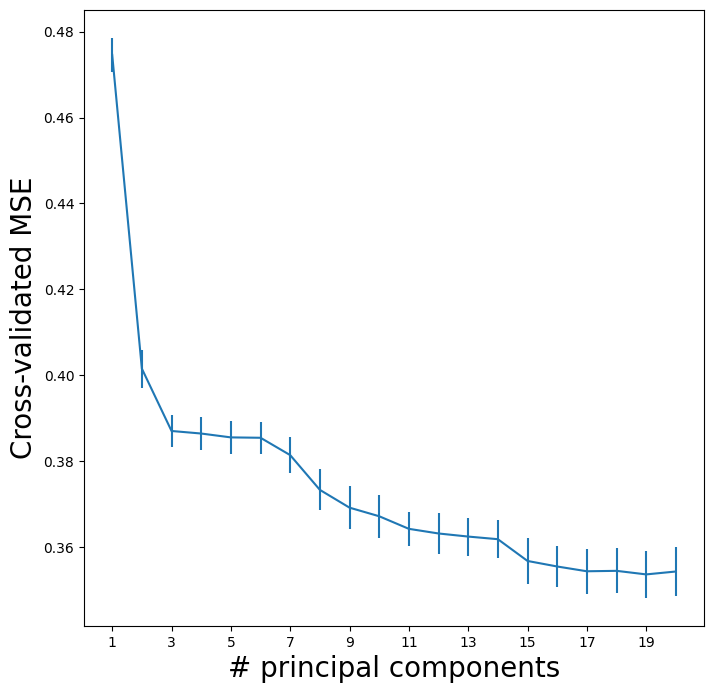

In [55]:
pcr_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])

In [56]:
# Update the pipeline with the best number of components

pca = PCA(n_components=19)
linreg = skl.LinearRegression()
pipe = Pipeline([('pca', pca), ('linreg', linreg)])
pipe.fit(X_train_tfidf.toarray(), y_numeric)
pipe.named_steps['linreg'].coef_

array([ 0.58601389,  3.54300944, -1.80386843,  0.31672012, -0.61459665,
        0.24610124,  1.7596047 ,  0.18185899,  1.40839259, -0.67628461,
       -1.13031049,  0.87030269,  0.30258801, -0.22473916, -1.28845477,
       -1.19578944,  0.74046689,  0.12418267, -0.75398933])

Below we use the pca model to run LDA and QDA.

In [57]:
X_train_lda = vectorizer.fit_transform(X_train).toarray()
X_test_lda = vectorizer.transform(X_test).toarray()

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train_pca = pipe.named_steps['pca'].transform(X_train_lda)

lda = LDA()
lda.fit(X_train_pca, y_train)

LinearDiscriminantAnalysis()

In [59]:
X_test_pca = pipe.named_steps['pca'].transform(X_test_lda)

y_pred_lda = lda.predict(X_test_pca)

print("Classification Report (LDA):")
print(classification_report(y_test, y_pred_lda))

print("Confusion Matrix (LDA):")
print(confusion_matrix(y_test, y_pred_lda))

Classification Report (LDA):
              precision    recall  f1-score   support

    negative       0.52      0.07      0.13       235
     neutral       0.69      0.62      0.65       390
    positive       0.81      0.95      0.88      1375

    accuracy                           0.79      2000
   macro avg       0.67      0.55      0.55      2000
weighted avg       0.75      0.79      0.74      2000

Confusion Matrix (LDA):
[[  17   57  161]
 [   3  241  146]
 [  13   50 1312]]


Text(0.5, 1.0, 'Confusion Matrix for LDA on Test Data')

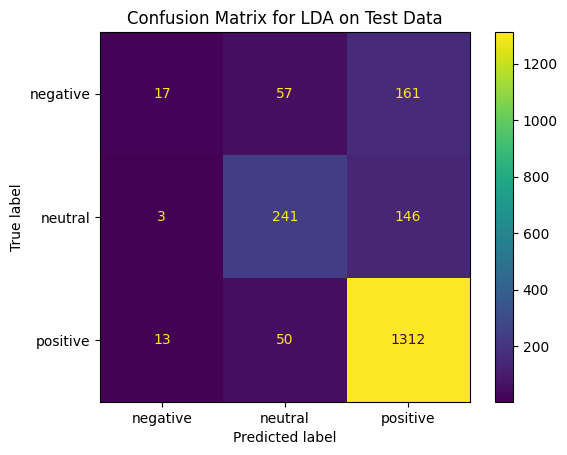

In [60]:
cm = confusion_matrix(y_test, y_pred_lda, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap='viridis')
disp.ax_.set_title('Confusion Matrix for LDA on Test Data')

In [ ]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA(store_covariance=True)
qda.fit(X_train_pca, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [ ]:
y_pred_qda = qda.predict(X_test_pca)

print("Classification Report (QDA):")
print(classification_report(y_test, y_pred_qda))

print("Confusion Matrix (QDA):")
print(confusion_matrix(y_test, y_pred_qda))

Classification Report (QDA):
              precision    recall  f1-score   support

    negative       0.24      0.35      0.29       204
     neutral       0.50      0.77      0.61       386
    positive       0.92      0.72      0.81      1410

    accuracy                           0.70      2000
   macro avg       0.56      0.62      0.57      2000
weighted avg       0.77      0.70      0.72      2000

Confusion Matrix (QDA):
[[  72   82   50]
 [  49  299   38]
 [ 174  215 1021]]


Text(0.5, 1.0, 'Confusion Matrix for QDA on Test Data')

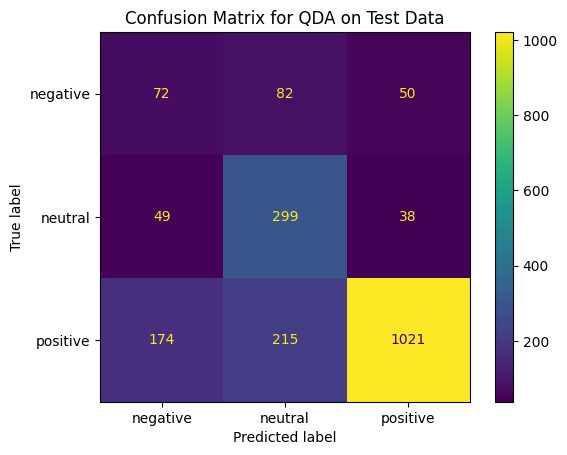

In [ ]:
cm = confusion_matrix(y_test, y_pred_qda, labels=["negative", "neutral", "positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "neutral", "positive"])
disp.plot(cmap='viridis')
disp.ax_.set_title('Confusion Matrix for QDA on Test Data')

Out of all the models we have run thus far, Logistic Regression has the best accuracy. We will test regularization strength to see if we can improve the logistic regression model.


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt

Regularization Strength: 1e-05, Test Set Accuracy: 0.7050
Regularization Strength: 0.0001, Test Set Accuracy: 0.7050
Regularization Strength: 0.001, Test Set Accuracy: 0.7050
Regularization Strength: 0.01, Test Set Accuracy: 0.7050
Regularization Strength: 0.1, Test Set Accuracy: 0.7510
Regularization Strength: 1, Test Set Accuracy: 0.9115
Regularization Strength: 10, Test Set Accuracy: 0.9690
Regularization Strength: 100, Test Set Accuracy: 0.9670
Regularization Strength: 1000, Test Set Accuracy: 0.9655
Regularization Strength: 10000, Test Set Accuracy: 0.9655


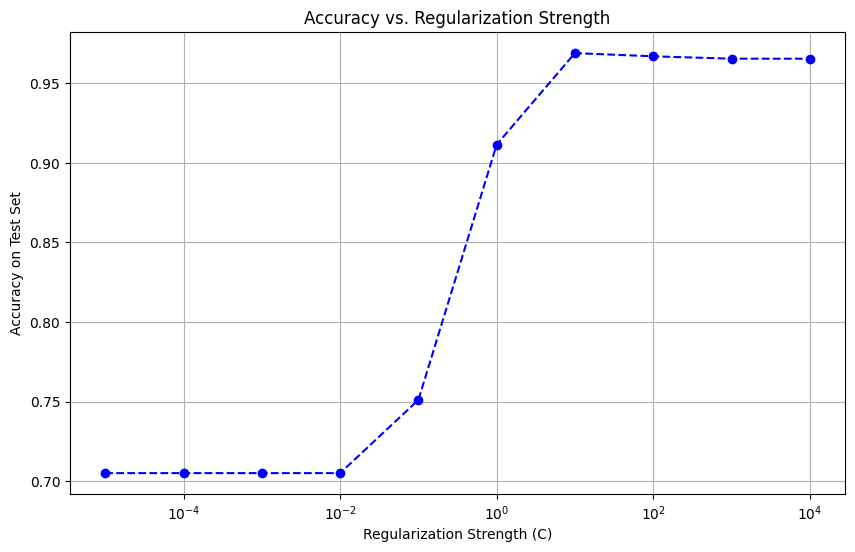

In [ ]:
# Logistic Regression has the best accuracy. We will test regularization strength to see if we can improve the model

reg_strengths = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

accuracies = []

for reg_strength in reg_strengths:
    classifier = LogisticRegression(C=reg_strength, penalty='l2', solver='liblinear', random_state=42)
    classifier.fit(X_train_tfidf, y_train)

    # YOUR CODE BELOW TO EVALUATE ON DEV SET
    y_pred_log_reg = classifier.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred_log_reg)

    accuracies.append(accuracy)

    print(f"Regularization Strength: {reg_strength}, Test Set Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(reg_strengths, accuracies, marker='o', linestyle='--', color='b')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy on Test Set')
plt.title('Accuracy vs. Regularization Strength')
plt.grid(True)
plt.show()

Now, we will extract the 5 least and most predicitve features that help the logistic regression model classify the Yelp reviews. Not: our features are specific words from the text as opposed to variables from the original dataset.

In [ ]:
feature_names = vectorizer.get_feature_names_out()

for class_idx, class_label in enumerate(log_reg.classes_):
    print(f"\nClass: {class_label}")
    coefficients = log_reg.coef_[class_idx]
    sorted_indices = np.argsort(np.abs(coefficients))

    least_predictive_features = [(feature_names[i], coefficients[i]) for i in sorted_indices[:5]]
    most_predictive_features = [(feature_names[i], coefficients[i]) for i in sorted_indices[-5:]]

    print("5 Least Predictive Features:")
    for feature, coef in least_predictive_features:
        print(f"{feature}: {coef:.4f}")

    print("\n5 Most Predictive Features:")
    for feature, coef in most_predictive_features:
        print(f"{feature}: {coef:.4f}")




Class: negative
5 Least Predictive Features:
crepe: -0.0000
casserole: -0.0001
baklava: -0.0002
squeeze: -0.0003
promised: -0.0003

5 Most Predictive Features:
good: 2.0237
nothing: 2.0351
ok: 2.1233
wasnt: 2.2110
however: 2.2196

Class: neutral
5 Least Predictive Features:
sufficed: 0.0000
transportation: -0.0000
150: 0.0001
flying: -0.0002
settled: -0.0002

5 Most Predictive Features:
amazing: -2.9212
good: -3.0351
delicious: -3.2339
worst: 3.2780
great: -3.7334

Class: positive
5 Least Predictive Features:
valuable: 0.0000
crossed: 0.0000
bent: 0.0004
307: -0.0004
stiffing: -0.0004

5 Most Predictive Features:
ok: -2.8523
definitely: 2.9497
delicious: 3.4763
amazing: 3.8912
great: 4.4072


In [ ]:
import pandas as pd

# Data for the table
data = {
    "Class": [
        "negative", "negative", "negative", "negative", "negative",
        "negative", "negative", "negative", "negative", "negative",
        "neutral", "neutral", "neutral", "neutral", "neutral",
        "neutral", "neutral", "neutral", "neutral", "neutral",
        "positive", "positive", "positive", "positive", "positive",
        "positive", "positive", "positive", "positive", "positive"
    ],
    "Predictive Type": [
        "Least Predictive", "Least Predictive", "Least Predictive", "Least Predictive", "Least Predictive",
        "Most Predictive", "Most Predictive", "Most Predictive", "Most Predictive", "Most Predictive",
        "Least Predictive", "Least Predictive", "Least Predictive", "Least Predictive", "Least Predictive",
        "Most Predictive", "Most Predictive", "Most Predictive", "Most Predictive", "Most Predictive",
        "Least Predictive", "Least Predictive", "Least Predictive", "Least Predictive", "Least Predictive",
        "Most Predictive", "Most Predictive", "Most Predictive", "Most Predictive", "Most Predictive"
    ],
    "Feature": [
        "singing", "seeking", "dire", "measly", "aka",
        "good", "amazing", "delicious", "worst", "great",
        "pad", "immaculate", "television", "mild", "boil",
        "give", "okay", "nothing", "ok", "however",
        "brings", "champagne", "biz", "scramble", "visual",
        "ok", "excellent", "amazing", "delicious", "great"
    ],
    "Coefficient": [
        -0.0000, -0.0001, -0.0001, 0.0001, 0.0002,
        -2.7560, -2.8259, -3.2903, 3.4183, -3.7890,
        0.0001, -0.0001, -0.0002, 0.0002, -0.0003,
        1.8700, 1.9497, 2.0913, 2.1879, 2.3542,
        0.0000, 0.0001, 0.0001, 0.0001, 0.0002,
        -2.9563, 3.0969, 3.7197, 4.2997, 4.3047
    ]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
file_path = "/Users/sophieshayne/Downloads/Predictive_Features.csv"
df.to_csv(file_path, index=False)

import ace_tools as tools; tools.display_dataframe_to_user(name="Predictive Features Table", dataframe=df)

file_path

ModuleNotFoundError: No module named 'ace_tools'